Michigan 2018 general election results by county downloaded from https://mielections.us/election/results/2018GEN_CENR.html#.

Data cleaned and manipulated to give Democratic vs Republican vote totals and percentages by Michigan state legislative district.

Michigan State Senate Results (Democratic and Republican)

In [3]:
import pandas as pd
results = pd.read_csv(r"Data\2018GEN_MI_CENR_BY_COUNTY.csv",sep=",")

# slicing state senate results section of the results
results_senate = results.loc[results['OfficeCode(Text)'] == '7']

# header showing how existing data is structured
results_senate.head(5)

,ElectionDate,OfficeCode(Text),DistrictCode(Text),StatusCode,CountyCode,CountyName,OfficeDescription,PartyOrder,PartyName,PartyDescription,CandidateID,CandidateLastName,CandidateFirstName,CandidateMiddleName,CandidateFormerName,CandidateVotes,WriteIn(W)/Uncommitted(Z),Recount(*),Nominated(N)/Elected(E)
3345,11/6/2018,7,100,0,82.0,WAYNE,1st District State Senator 4 Year Term (1) Pos...,1.0,REP,Republican,518804.0,Montie,Pauline,NaN,NaN,20879.0,NaN,NaN,NaN
3346,11/6/2018,7,100,0,82.0,WAYNE,1st District State Senator 4 Year Term (1) Pos...,2.0,DEM,Democratic,518192.0,Chang,Stephanie,NaN,NaN,62071.0,NaN,NaN,E
3347,11/6/2018,7,100,0,82.0,WAYNE,1st District State Senator 4 Year Term (1) Pos...,5.0,GRN,Green,519044.0,Bullock,David,NaN,NaN,3257.0,NaN,NaN,NaN
3348,11/6/2018,7,200,0,82.0,WAYNE,2nd District State Senator 4 Year Term (1) Pos...,1.0,REP,Republican,518875.0,Papas,Lisa,NaN,NaN,17288.0,NaN,NaN,NaN
3349,11/6/2018,7,200,0,82.0,WAYNE,2nd District State Senator 4 Year Term (1) Pos...,2.0,DEM,Democratic,518228.0,Hollier,Adam,NaN,NaN,53920.0,NaN,NaN,E


In [4]:
# cleaning and reformatting data to simplify use
results_senate = results_senate[['DistrictCode(Text)','CountyName','PartyName','CandidateLastName','CandidateFirstName','CandidateVotes']]
results_senate = results_senate.rename(columns={'DistrictCode(Text)':'District'})
results_senate['District'] = results_senate['District'].str.replace('00','')
results_senate = results_senate.drop([3351])
results_senate['CandidateName'] = results_senate['CandidateFirstName'] + " " + results_senate['CandidateLastName']
results_senate = results_senate.drop(columns=['CandidateLastName','CandidateFirstName'])

# grouping results by district and party vote totals
grouped_results = results_senate.groupby(by=['District','PartyName'])
districts = range(1,39,1)
results_by_district = pd.DataFrame(districts,columns=['District'])
results_by_district = results_by_district.set_index(['District'])
results_by_district = results_by_district.reindex(columns=['DemVotes','RepVotes'])

# iterating over groups to fill the new dataframe
for key, group in grouped_results:
    if key[1] in ['GRN','LIB','NPA']:
        continue
    total = grouped_results.get_group(key)['CandidateVotes'].sum()
    if key[1] == 'DEM':
        results_by_district.at[int(key[0]),'DemVotes'] = total
    elif key[1] == 'REP':
        results_by_district.at[int(key[0]),'RepVotes'] = total
        
# calculating vote shares as percentage of 2 party
results_by_district['DemShare'] = results_by_district['DemVotes'] / (results_by_district['DemVotes']+results_by_district['RepVotes'])
results_by_district['RepShare'] = results_by_district['RepVotes'] / (results_by_district['DemVotes']+results_by_district['RepVotes'])
results_by_district['Difference'] = results_by_district['DemShare'] - results_by_district['RepShare']

# converting district index back to column for join
results_by_district = results_by_district.reset_index()

# showing new dataframe with vote totals and %s
print(results_by_district)

    District  DemVotes  RepVotes  DemShare  RepShare  Difference
0          1   62071.0   20879.0  0.748294  0.251706    0.496588
1          2   53920.0   17288.0  0.757218  0.242782    0.514437
2          3   58405.0   10928.0  0.842384  0.157616    0.684768
3          4   58107.0   16115.0  0.782881  0.217119    0.565762
4          5   70010.0   16479.0  0.809467  0.190533    0.618934
5          6   60789.0   38301.0  0.613473  0.386527    0.226945
6          7   69434.0   65001.0  0.516488  0.483512    0.032975
7          8   47154.0   76172.0  0.382352  0.617648   -0.235295
8          9   65736.0   34013.0  0.659014  0.340986    0.318028
9         10   52277.0   57353.0  0.476849  0.523151   -0.046301
10        11   99916.0   27157.0  0.786288  0.213712    0.572576
11        12   59302.0   58363.0  0.503990  0.496010    0.007980
12        13   73146.0   67798.0  0.518972  0.481028    0.037944
13        14   48578.0   64253.0  0.430538  0.569462   -0.138925
14        15   62936.0   

State senate shapefile from https://gis-michigan.opendata.arcgis.com/datasets/96f55882b15040fbb1d32baf17897ec8_16.

In [6]:
# importing shapefile of state senate district lines
import geopandas as gpd
shape = gpd.read_file(r'Data/MichiganStateSenateDistricts/Michigan_State_Senate_Districts__v17a_.shp')
shape.head(38)

,OBJECTID,NAME,LABEL,TYPE,LEGISLATOR,PARTY,URL,SQKM,SQMILES,ACRES,VER,LAYOUT,PENINSULA,ShapeSTAre,ShapeSTLen,geometry
0,1,27,27,District,Jim Ananich,D,https://senatedems.com/ananich/,754.606,291.354,186465.147,17A,landscape,lower,1.416957e+09,1.796074e+05,"POLYGON ((695328.947 270629.199, 695073.056 27..."
1,2,23,23,District,"Curtis Hertel, Jr.",D,https://senatedems.com/hertel/,1111.330,429.085,274612.589,17A,portrait,lower,2.051859e+09,2.073206e+05,"POLYGON ((614705.578 221854.427, 614704.991 22..."
2,3,20,20,District,Sean McCann,D,https://senatedems.com/mccann/,1502.105,579.963,371174.188,17A,portrait,lower,2.744440e+09,2.093856e+05,"POLYGON ((519315.574 180983.485, 519297.303 18..."
3,4,29,29,District,Winnie Brinks,D,https://senatedems.com/brinks/,632.507,244.211,156294.155,17A,landscape,lower,1.180287e+09,2.186925e+05,"POLYGON ((531870.558 262209.725, 531872.589 26..."
4,5,28,28,District,Peter MacGregor,R,https://www.senatorpetermacgregor.com/,1477.402,570.426,365070.092,17A,portrait,lower,2.774894e+09,3.340788e+05,"MULTIPOLYGON (((522268.744 265179.932, 522308...."
5,6,08,08,District,Pete Lucido,R,https://www.senatorpetelucido.com/,634.851,245.116,156873.464,17A,portrait,lower,1.177534e+09,3.111248e+05,"POLYGON ((757255.112 230273.675, 757257.750 23..."
6,7,10,10,District,Michael MacDonald,R,https://www.senatormichaelmacdonald.com/,240.038,92.679,59313.939,17A,portrait,lower,4.437642e+08,1.278022e+05,"POLYGON ((738714.891 229284.498, 738700.662 22..."
7,8,09,09,District,Paul Wojno,D,https://senatedems.com/wojno/,165.987,64.088,41015.962,17A,landscape,lower,3.057411e+08,8.560810e+04,"POLYGON ((752613.237 216517.701, 752604.636 21..."
8,9,13,13,District,Mallory McMorrow,D,https://senatedems.com/mcmorrow/,250.590,96.753,61921.473,17A,portrait,lower,4.630006e+08,1.357314e+05,"POLYGON ((736497.427 224477.429, 736365.036 22..."
9,10,11,11,District,Jeremy Moss,D,https://senatedems.com/moss/,220.683,85.206,54531.354,17A,landscape,lower,4.062229e+08,1.295679e+05,"POLYGON ((739533.798 217376.030, 739543.100 21..."


In [7]:
# adding new join column, joining dataframes together
shape['District'] = shape['NAME'].str.lstrip('0').astype(int)
shape = shape.merge(results_by_district, on='District')
shape.to_file('Data/MichiganStateSenateDistricts/StateSenateDistrictsWithVotes.shp')

Final layout of vote shares designed with QGIS

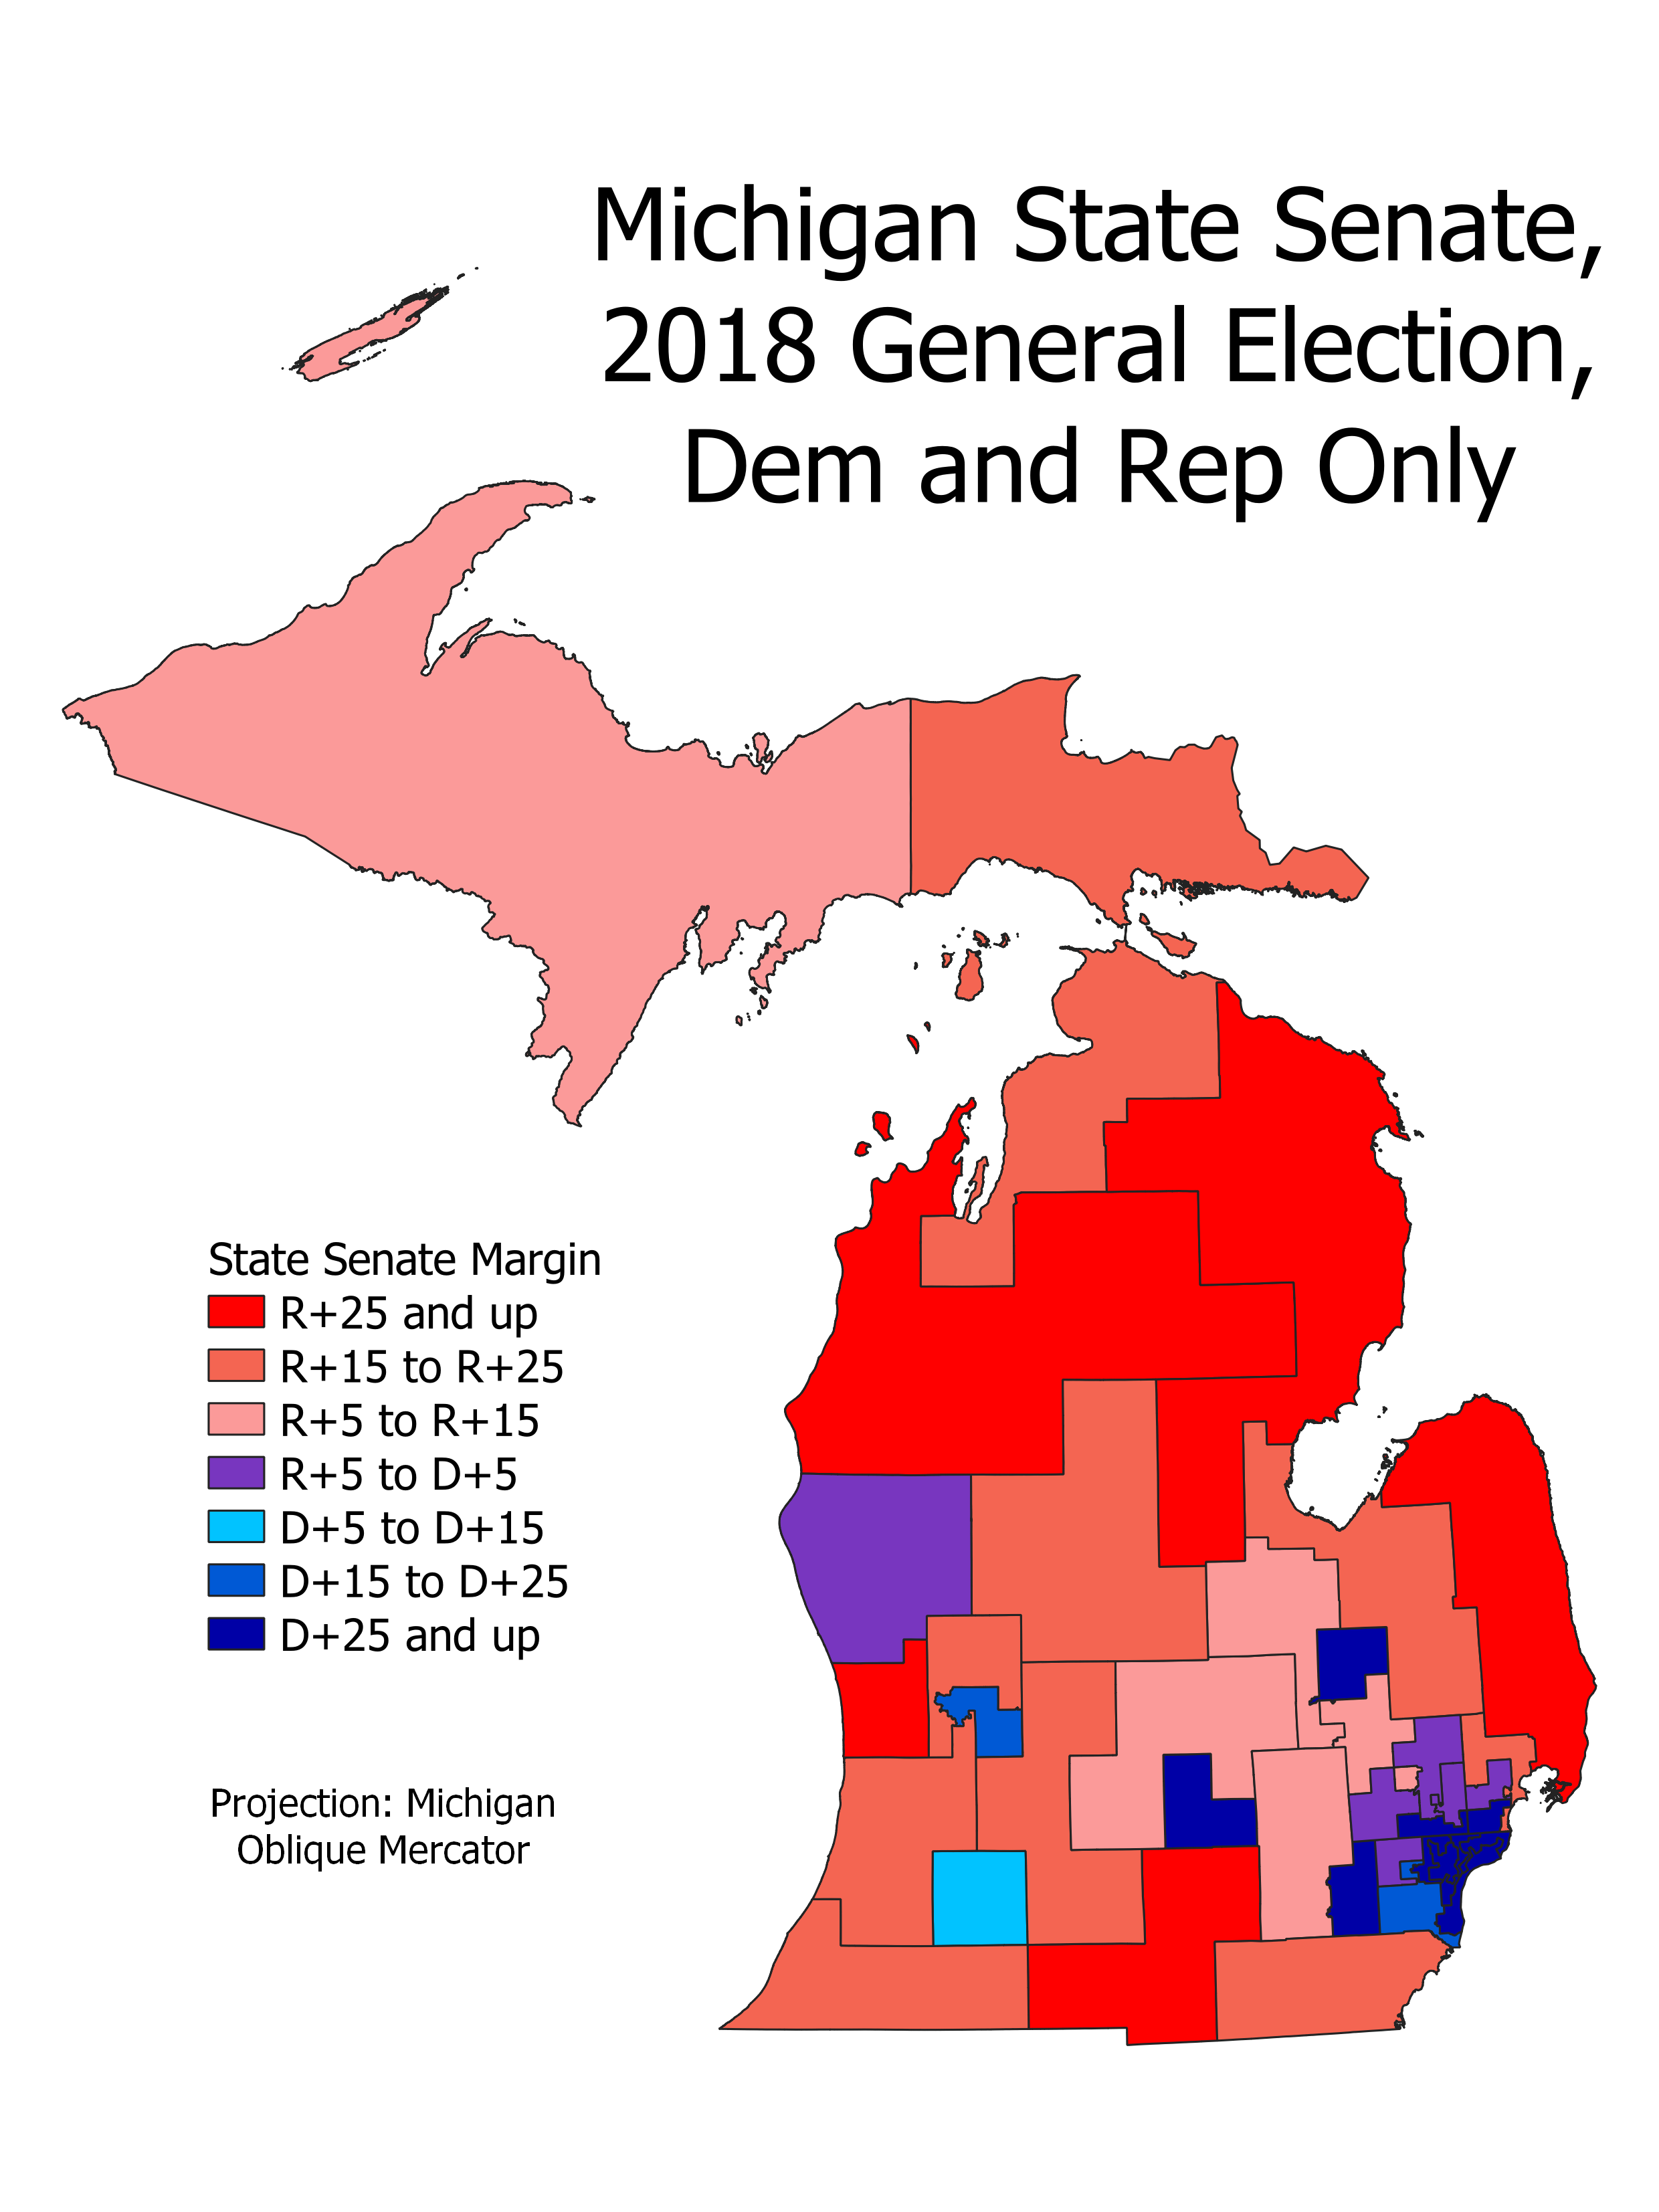

In [10]:
from IPython.display import Image
Image(filename='Layouts/StateSenate.png')